
Линк към заданието на Проект - статистика: [задание](https://docs.google.com/document/d/1ExdNre1RGcy22nhEUMqt2QOm3Mp6VENpzWc5nc420k8/edit?usp=drive_link)





# Task 1

In [ ]:
import csv
from difflib import get_close_matches

#Importing libraries

# Функция за запазване на променени данни в нов нов файл
Идеята на тази функция е, че ние вземаме промените от другите функции, след като са били изпълнени, и ги запазваме в нов файл, който ще бъде използван по-късно - по този начин имаме последователни и правилни данни


In [ ]:
def save_changes_to_csv(changes):
    with open("/content/sample_data/pokemon_stats_fixed.csv", 'w', newline='') as changes_file:
        fieldnames = ['name', 'height', 'weight', 'type', 'secundary type', 'hp', 'attack', 'defense', 'sp atk', 'sp def', 'speed']
        writer = csv.DictWriter(changes_file, fieldnames=fieldnames)
        writer.writeheader()
        for pokemon, data in changes.items():
            writer.writerow({'name': pokemon,
                             'height': data.get('height'),
                             'weight': data.get('weight'),
                             'type': data.get('type'),
                             'secundary type': data.get('secundary type'),
                             'hp': data.get('hp'),
                             'attack': data.get('attack'),
                             'defense': data.get('defense'),
                             'sp atk': data.get('sp atk'),
                             'sp def': data.get('sp def'),
                             'speed': data.get('speed')})


# Функция за четене от файл

Тази функция се използва за еднократно чете от файл

In [ ]:
def read_file(filename):
  rows = []
  with open(filename, 'r', newline='') as file:
      reader = csv.DictReader(file)
      for row in reader:
          rows.append(row)

  return rows

# Функция за принтиране на колони

Тази функция принтира форматирано колоните

In [ ]:
def print_rows(rows):
    print("{:<15} {:<7} {:<7} {:<10} {:<15} {:<3} {:<5} {:<7} {:<6} {:<6} {:<5}".format(
        'Name', 'Height', 'Weight', 'Type', 'Secondary Type', 'HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed'))

    for row in rows:
        print("{:<15} {:<7} {:<7} {:<10} {:<15} {:<3} {:<5} {:<7} {:<6} {:<6} {:<5}".format(
            row['name'], row['height'], row['weight'], row['type'], row['secundary type'],
            row['hp'], row['attack'], row['defense'], row['sp atk'], row['sp def'], row['speed']))


# Функция за премахване на дубликиращи се елементи
В тази фунцкия използвам структурата от данни наречена "dictionary", която при добавяне на елемент игногира ако вече има същестуващи данни със същия ключ - за ключ ползвам името на покемона, защото това не трябва да се повтаря!


Наблюденията ми след изпълняването на фунцията ми са, че няма повтарящи се имена.


In [ ]:
def remove_duplicates(filename):
    unique_rows = {}

    for row in rows:
      name = row['name']
      if name not in unique_rows:
          unique_rows[name] = row

    print("Data from csv file")
    print_rows(unique_rows.values())

    return unique_rows



``Checking every row and saving the info into dict, because the keys is unique so if there are rows with the same "Name", they are skipped.``

In [ ]:
filename = '/content/sample_data/pokemon_stats.csv'
filename_to_save = '/content/sample_data/pokemon_stats_fixed.csv'
changes = {}
rows = read_file(filename)
#Setting some vars

In [ ]:
changes = remove_duplicates(filename)

Data from csv file
Name            Height  Weight  Type       Secondary Type  HP  Attack Defense Sp Atk Sp Def Speed
bulbasaur       7       69      grass      poison          45  49    49      65     65     45   
fushigisou      10      130     grass      poison          60  62    63      80     80     60   
ivysaur         10      130     grass      poison          60  62    63      80     80     60   
venusaur        20      1000    grass      poison          80  82    83      100    100    80   
charmander      6       85      fire       None            39  52    43      60     50     65   
charmeleon      11      190     fire       None            58  64    58      80     65     80   
charizard       17      905     fire       flying          78  84    78      109    85     100  
squirtle        5       90      water      None            44  48    65      50     64     43   
wartortle       10      225     water      None            59  63    80      65     80     58   
blastoise 

In [ ]:
pokemon_types = ['None', 'normal', 'fire', 'water', 'electric', 'grass', 'ice', 'fighting',
                 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock', 'ghost',
                 'dragon', 'dark', 'steel', 'fairy']
#Types of pokemons

# Функция за коригиране на грешки

Тази функция проверява дали типовете са написани граматически коректно и дали ги има в предефинирания list с типове покемони.

Наблюдението от функцията ми е, че покемон с име "herbizarre" има сгрешени/невалидни параметри, а покемони с име "snake", "doduo" и "jesusmon" не същестуват.


In [ ]:
def fix_errors():
    new_changes = changes.copy()
    changed_rows = []
    for row in changes.values():
        # Fix technical errors in type and secondary type
        new_type = find_closest_match(row['type'])
        new_sec_type = find_closest_match(row['secundary type'])

        if row['type'] != new_type or row['secundary type'] != new_sec_type:
            changed_rows.append({
                'name': row['name'],
                'old_type': row['type'],
                'new_type': new_type,
                'old_sec_type': row['secundary type'],
                'new_sec_type': new_sec_type
            })

            # changes[row['name']] = {'type': new_type, 'secundary type': new_sec_type}
            new_changes[row['name']]['type'] = new_type
            new_changes[row['name']]['secundary type'] = new_sec_type
        else:
            if new_type not in pokemon_types:
                entries_to_remove = []
                for pokemon, data in new_changes.items():
                    if data['type'] == new_type or data['secundary type'] == new_type:
                        entries_to_remove.append(pokemon)

                for pokemon in entries_to_remove:
                    print("Pokemon with name '" + pokemon + "' doesn't have correct type or doesn't exist")
                    new_changes.pop(pokemon)
                continue
            elif new_sec_type not in pokemon_types:
                entries_to_remove = []
                for pokemon, data in new_changes.items():
                    if data['type'] == new_sec_type or data['secundary type'] == new_sec_type:
                        entries_to_remove.append(pokemon)

                for pokemon in entries_to_remove:
                    print("Pokemon with name '" + pokemon + "' doesn't have correct type or doesn't exist")
                    new_changes.pop(pokemon)
                continue

    print("Data with fixed errors:")
    print("{:<15} {:<10} {:<15} {:<10} {:<15}".format('Name', 'Old Type', 'New Type', 'Old Sec. Type', 'New Sec. Type'))
    for row in changed_rows:
        print("{:<15} {:<10} {:<15} {:<10} {:<15}".format(row['name'], row['old_type'], row['new_type'], row['old_sec_type'], row['new_sec_type']))



    return new_changes


In [ ]:
def find_closest_match(word):
    if word.lower() not in pokemon_types:
        closest_match = get_close_matches(word, pokemon_types, n=1)
        if closest_match:
            return closest_match[0]
        return word
    elif word == 'None':
        return word
    return word.lower()

``using the 'difflib' library so it can match the words properly based on what error is - if it is only that it has capital letters in the middle of the word - it just returns the word + the function .lower() and if not - it uses the get_close_matches() function from the library``

In [ ]:
changes = fix_errors()

Pokemon with name 'snake' doesn't have correct type or doesn't exist
Pokemon with name 'jesusmon' doesn't have correct type or doesn't exist
Pokemon with name 'doduo' doesn't have correct type or doesn't exist
Pokemon with name '' doesn't have correct type or doesn't exist
Data with fixed errors:
Name            Old Type   New Type        Old Sec. Type New Sec. Type  
herbizarre      grass      grass           PoIsOn     poison         


# Функция за стандартизиране на параметрите

Тази функция има за цел да стандартизира всички параметри да "изглеждат" по един и същ начин.
В този случай аз правя всичко да е с малки букви.

Наблюдението ми е, че навсякъде, където има "None", то става на "none"

In [ ]:
def standardize_case():
    new_changes = changes.copy()
    changed_rows = []
    for row in changes.values():
        new_type = row['type'].lower()
        new_sec_type = row['secundary type'].lower()
        if row['type'] != new_type or row['secundary type'] != new_sec_type:
            changed_rows.append({
                'name': row['name'],
                'height': row['height'],
                'weight': row['weight'],
                'type': new_type,
                'secundary type': new_sec_type,
                'hp': row['hp'],
                'attack': row['attack'],
                'defense': row['defense'],
                'sp atk': row['sp atk'],
                'sp def': row['sp def'],
                'speed': row['speed']
            })
            # changes[row['name']]['type'] = new_type
            # changes[row['name']]['secundary type'] = new_sec_type
            new_changes[row['name']]['type'] = new_type
            new_changes[row['name']]['secundary type'] = new_sec_type

    print("Data with standardized text format:")
    print_rows(changed_rows)

    return new_changes

```making everything into small letters```

In [ ]:
changes = standardize_case()

Data with standardized text format:
Name            Height  Weight  Type       Secondary Type  HP  Attack Defense Sp Atk Sp Def Speed
charmander      6       85      fire       none            39  52    43      60     50     65   
charmeleon      11      190     fire       none            58  64    58      80     65     80   
squirtle        5       90      water      none            44  48    65      50     64     43   
wartortle       10      225     water      none            59  63    80      65     80     58   
blastoise       16      855     water      none            79  83    100     85     105    78   
caterpie        3       29      bug        none            45  30    35      20     20     45   
metapod         7       99      bug        none            50  20    55      25     25     30   
rattata         3       35      normal     none            30  56    35      25     35     72   
raticate        7       185     normal     none            55  81    60      50     70    

# Фунцкия за превеждане на име

Тази функция превежда имена от различни езици на английски - това позволява да имаме по-коректни данни.

С помощщта на предефинират "translation_mapping" dictionary, може да забележим, че има 4 имена, които не са написани на английски.


In [ ]:
# Mapping wrong Pokemon names to English names
translation_mapping = {
    'fushigisou': 'Ivysaur',  # Japanese
    'herbizarre': 'Venusaur',  # French
    'farfetchd': 'Farfetch\'d', #apostrophe is part of the name
    'simight': 'Gardevoir' # Japanese
    # Hope these are all
}




In [ ]:
def translate_data():
    new_changes = changes.copy()
    translated_rows = []
    for row in changes.values():
        translated_name = translation_mapping.get(row['name'], row['name'])
        if translated_name != row['name']:
            row['old_name'] = row['name']
            row['name'] = translated_name
            translated_rows.append(row)
            new_changes[translated_name] = row
            del new_changes[row['old_name']]

    print("Translated data:")
    print("{:<15} {:<15} {:<7} {:<7} {:<10} {:<15} {:<3} {:<5} {:<7} {:<6} {:<6} {:<5}".format(
        'Old Name', 'Name', 'Height', 'Weight', 'Type', 'Secondary Type', 'HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed'))

    for row in translated_rows:
        print("{:<15} {:<15} {:<7} {:<7} {:<10} {:<15} {:<3} {:<5} {:<7} {:<6} {:<6} {:<5}".format(
            row['old_name'], row['name'], row['height'], row['weight'], row['type'], row['secundary type'],
            row['hp'], row['attack'], row['defense'], row['sp atk'], row['sp def'], row['speed']))

    return new_changes


```if there is a name that is in other language from English (and it is written in the 'translation_mapping' dict we first change the values then add a new row and delete the old one```

In [ ]:
changes = translate_data()

Translated data:
Old Name        Name            Height  Weight  Type       Secondary Type  HP  Attack Defense Sp Atk Sp Def Speed
fushigisou      Ivysaur         10      130     grass      poison          60  62    63      80     80     60   
herbizarre      Venusaur        15      125     grass      poison          120 60    61      76     76     58   
farfetchd       Farfetch'd      8       150     normal     flying          52  90    55      58     62     60   
simight         Gardevoir       20      150     psychic    fairy           128 63    63      117    108    76   


# Функция за премахване на данни с празни полета

Тази функция има за цел да коригира данните, посредством триене на редовете, които имат празни полета.

От output-а на функцията може да се види, че няма ред, който няма невалидни стойности.

In [ ]:
def remove_empty_data(filename):
    new_changes = changes.copy()
    with open(filename, 'r', newline='') as file:
        reader = csv.DictReader(file)
        removed_rows = [row for row in reader if not all(row.values())]
        file.seek(0)

        cleaned_data = [row for row in reader if all(row.values())]

    print("Data to be removed (empty rows):")
    print_rows(removed_rows)

    for row in removed_rows:
        if row['name'] in new_changes:
            del new_changes[row['name']]

    return new_changes


In [ ]:
save_changes_to_csv(changes)
changes = remove_empty_data(filename_to_save)

Data to be removed (empty rows):
Name            Height  Weight  Type       Secondary Type  HP  Attack Defense Sp Atk Sp Def Speed


In [ ]:
save_changes_to_csv(changes)  #saving the changes so i can continue with them  (if we want to seperate the tasks into different files)

# Task 2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
filename = '/content/sample_data/pokemon_stats_fixed.csv'
final_rows = changes.values()

# Функция за изкарване на най-срещания вид

Тази фунцкия има за цел да мине през целия поправен dataset и да върне този type, който е най-често срещан.

Моите наблюдения са, че това е type water

In [ ]:
def most_common_type():
    type_counts = {}
    for row in final_rows:
        pokemon_type = row['type']
        type_counts[pokemon_type] = type_counts.get(pokemon_type, 0) + 1

    most_common_type = max(type_counts, key=type_counts.get)
    print("The most common type is:", most_common_type)


In [ ]:
most_common_type()

The most common type is: water


# Функция за израване на колко пъти се среща типът posion

Тази фунцкия има за цел да мине през целия поправен dataset и да върне броя пъти, в които се е срещнал типът poison

Моите наблюдения са, че това са 35 пъти.

In [ ]:
def count_poison_type():
    poison_count = 0
    for row in final_rows:
        if row['type'] == 'poison' or row['secundary type'] == 'poison':  #mai trqbva i sec
            poison_count += 1

    print("Number of Pokemon that are Poison type:", poison_count)

In [ ]:
count_poison_type()

Number of Pokemon that are Poison type: 71


# Фунцкия за намиране на вероятността покемон да е от тип water и вторият му тип да е posion  

Тази фунцкия минава през всички покемони и се спира на тези, които имат първи тип - water, след което проверява дали вторият им тип е poison.

Наблюденитето ми от тази фунцкия е, че тази вероятност е 0.024390243902439025

In [ ]:
def chance_water_is_poison():
    water_count = 0
    water_poison_count = 0

    for row in final_rows:
        if row['type'] == 'water':
            water_count += 1
            if row['secundary type'] == 'poison':
                water_poison_count += 1

    if water_count == 0:
        probability = 0
    else:
        probability = water_poison_count / water_count            #classical probability

    print("Probability that a Water-type Pokemon is also Poison-type:", probability)


In [ ]:
chance_water_is_poison()

Probability that a Water-type Pokemon is also Poison-type: 0.024390243902439025


# Функция за изобразяване на типовете покемони

Тази фунцкия има за цел да изобрази всички възможни типове на покемоните и да покаже тяхната бройка.

Наблюденията ми показват, че най-много се среща water (както видяхме по-горе) с около 120 срещания, а най-малко flying - с около 10-тина.

In [ ]:
def type_histogram():
    type_counts = {}

    for row in final_rows:
        pokemon_type = row['type']
        type_counts[pokemon_type] = type_counts.get(pokemon_type, 0) + 1

    types = list(type_counts.keys())
    counts = list(type_counts.values())

    most_common_type = max(type_counts, key=type_counts.get)
    print("Most common type:", most_common_type)

    plt.figure(figsize=(10, 6))
    plt.bar(types, counts, color='skyblue')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.title('Histogram of Types of Pokemon')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Most common type: water


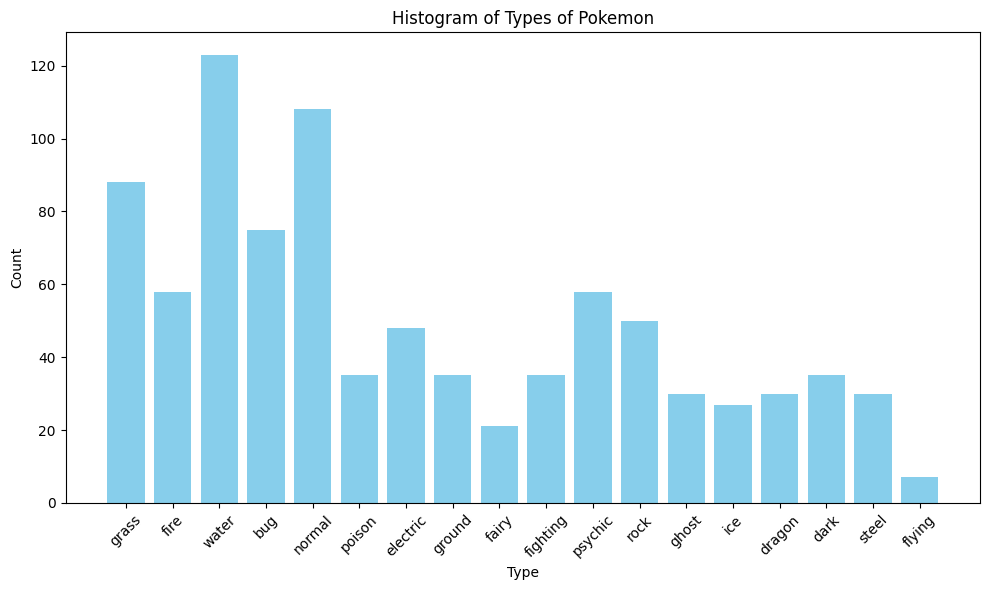

In [ ]:
type_histogram()

# Функция за изобразяване на вторите типовете покемони

Тази фунцкия има за цел да изобрази всички възможни втори типове на покемоните и да покаже тяхната бройка.

Наблюденията ми показват, че най-много се среща none, т.е да нямат втори тип с над 400 срещания, а най-малко normal - с около 15-тина.

In [ ]:
def secondary_type_histogram():
    type_counts = {}

    for row in final_rows:
        secondary_type = row['secundary type']
        if secondary_type:
            type_counts[secondary_type] = type_counts.get(secondary_type, 0) + 1

    most_common_secondary_type = max(type_counts, key=type_counts.get)
    print("Most common secondary type:", most_common_secondary_type)

    types = list(type_counts.keys())
    counts = list(type_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(types, counts, color='skyblue')
    plt.xlabel('Secondary Type')
    plt.ylabel('Count')
    plt.title('Histogram of Secondary Types of Pokemon')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Most common secondary type: none


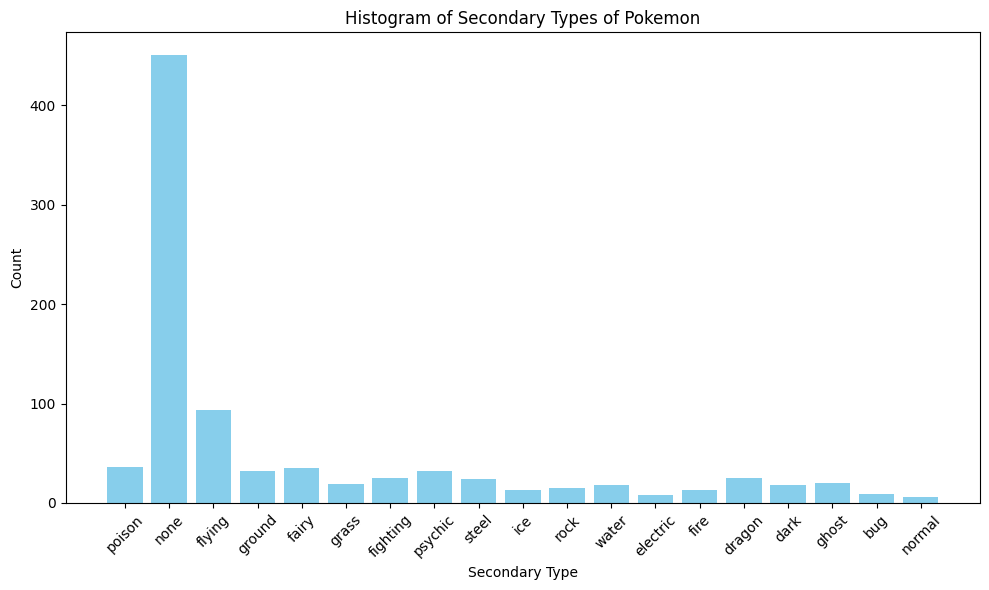

In [ ]:
secondary_type_histogram()

# Task 3


In [ ]:
import statistics
# добавяне на нужни библиотеки

# Функция за изчисляване на средноаритметичното на атаката на покемоните

Тази функция има за цел да изчисли средноаритемтично колко голяма е атаките на всички покемони.
Наблюденията ми от фунцкията са, че средноаритметичната атака е 76.25

In [ ]:
def calculate_average_attack():
    total_attack = 0
    num_pokemon = 0

    for row in final_rows:
        total_attack += int(row['attack'])
        num_pokemon += 1

    average_attack = total_attack / num_pokemon
    return average_attack


In [ ]:
print(calculate_average_attack())


76.25531914893617


# Функция за изобразяване на средноариметичните стойности на всяка числова колона
Тази функция има за цел взимане на средноариметичните стойности на "height", "weight", "hp", "attack", "defense", "sp attack", "sp defense" и "speed" и ги изобразява чрез сълбова диаграма.
Наблюденията ми по фунцкията са, че най-голяма средноаритметична стойност има "weight" с над 600, а най-малко е "height" - под 50.


In [ ]:
def plot_arithmetic_means(arithmetic_means):
    plt.figure(figsize=(10, 6))
    plt.bar(arithmetic_means.keys(), arithmetic_means.values(), color='skyblue')
    plt.xlabel('Numerical Variables')
    plt.ylabel('Arithmetic Mean')
    plt.title('Arithmetic Means of Numerical Variables')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
def calculate_arithmetic_means(filename):
    numerical_variables = {}
    with open(filename, 'r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            for key, value in row.items():
                if key != 'name' and key != 'type' and key != 'secundary type':
                    if key not in numerical_variables:
                        numerical_variables[key] = []
                    numerical_variables[key].append(int(value))

    arithmetic_means = {}
    for key, values in numerical_variables.items():
        arithmetic_means[key] = statistics.mean(values)

    return arithmetic_means, numerical_variables


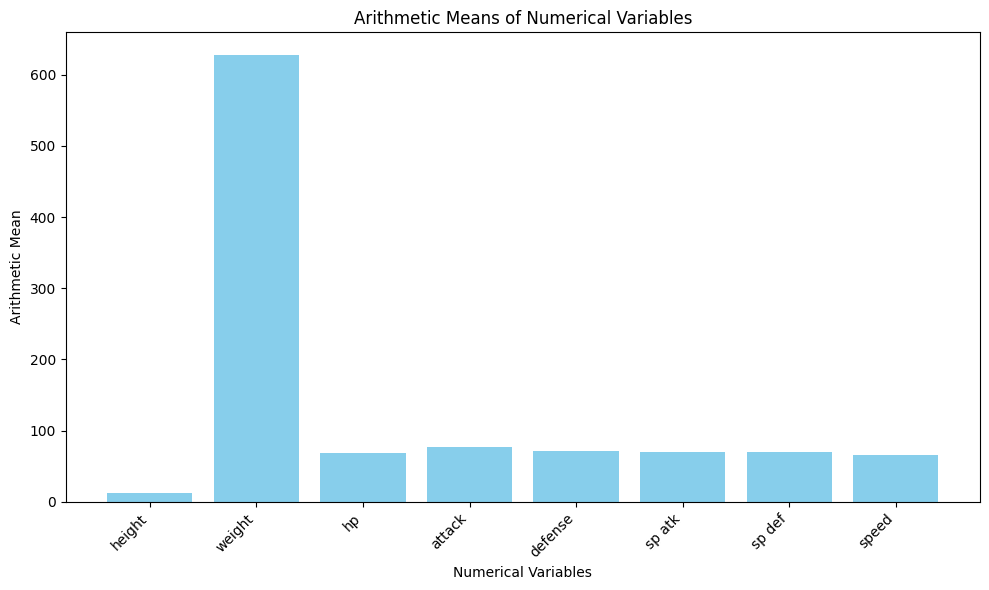

In [ ]:
arithmetic_means, numerical_variables = calculate_arithmetic_means(filename)
plot_arithmetic_means(arithmetic_means)


# Функция за проверяване за съвпадение между модата и със средноаритметичните стойности на всички числови променливи

Тази функция ползва вече изчислената средна стойност от предходната функция и на база нея с помощщта на стандартната библиотека ``statistics`` проверява дали модата съвпада средноаритметичните стойности на всички числови променливи.

Наблюденията ми по тази функция са, че нито едно не съвпада

In [ ]:
def check_mode_matches_arithmetic_mean(numerical_variables):
    mode_matches_mean = {}
    for key, values in numerical_variables.items():
        mode = statistics.mode(values)
        mean = statistics.mean(values)
        mode_matches_mean[key] = mode == mean

    print("Mode Matches Arithmetic Mean:")
    for key, value in mode_matches_mean.items():
        print(f"{key}: {value}")


In [ ]:
check_mode_matches_arithmetic_mean(numerical_variables)



Mode Matches Arithmetic Mean:
height: False
weight: False
hp: False
attack: False
defense: False
sp atk: False
sp def: False
speed: False


# Функция за изчисляване на линейна регресия

Тази функция приема параметри х и y и смята.

In [ ]:
def linear_regression(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x_squared = sum(x_i ** 2 for x_i in x)
    numerator = n * sum_xy - sum_x * sum_y
    denominator = n * sum_x_squared - sum_x ** 2

    slope = numerator / denominator
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept


# Фунцкия за предвиждане на височина на база линейна регресия и стойността на атаката
Тази фунцкия използва линейна регресия и използва параметрите "attack" и "height", за да предвиди, колко би бил висок един покемон с атака 85.

Моите наблюдения са, че този покемон ще е около 13 мерни единици.

In [ ]:
def predict_height(attack_value):
    attack = []
    height = []

    for row in final_rows:
      attack.append(int(row['attack']))
      height.append(int(row['height']))

    slope, intercept = linear_regression(attack, height)
    predicted_height = slope * attack_value + intercept

    return predicted_height


In [ ]:
print(f"Predicted height of a Pokemon with 85 attack: {predict_height(85)}")


Predicted height of a Pokemon with 85 attack: 13.213722575774858


# Фунцкия за анализиране на теглото спрямо неговия special defense

Тази фунцкия използва коефициентът на корелация на Пиърсън, която има за цел да върне този коефициент.

Моите наблюдения са, че коефициентът между теглото и special defense-а е около 2.68

In [ ]:
def analyze_weight():
    special_defense = []
    weight = []
    for row in final_rows:
        special_defense.append(int(row['sp def']))
        weight.append(int(row['weight']))

    slope, intercept = linear_regression(special_defense, weight)

    plt.scatter(special_defense, weight)
    plt.plot(special_defense, [slope * x + intercept for x in special_defense], color='red')
    plt.xlabel('Special Defense')
    plt.ylabel('Weight')
    plt.title('Weight vs Special Defense with Linear Regression')
    plt.show()


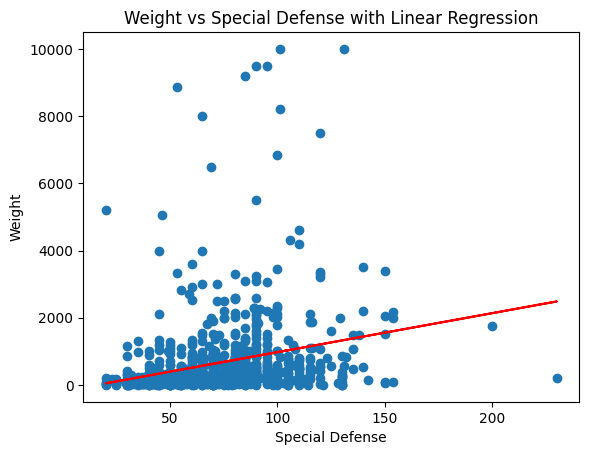

In [ ]:
analyze_weight()